<a href="https://colab.research.google.com/github/thaistelesr/eda_industria_automobilistica/blob/main/An%C3%A1lise_explorat%C3%B3ria_Ind%C3%BAstria_automobil%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A partir das bibliotecas a seguir, resolver as questões propostas.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Exercício 1:  Faça a leitura inicial dos dados e explore suas informações, estude seus tipos, sua forma e apresente uma análise inicial das medidas de dispersão de seus atributos.

In [ ]:
#Carregando os dados
dados = pd.read_csv("auto_industry.csv")

In [ ]:
#Tipos de dados presentes no banco de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
#Informações iniciais das 5 primeiras linhas
dados.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
#Estatísticas descritivas dos dados carregados
dados.describe().round()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.0,398.0,398.0,392.0,398.0,398.0,398.0
mean,24.0,5.0,193.0,104.0,2970.0,16.0,76.0
std,8.0,2.0,104.0,38.0,847.0,3.0,4.0
min,9.0,3.0,68.0,46.0,1613.0,8.0,70.0
25%,18.0,4.0,104.0,75.0,2224.0,14.0,73.0
50%,23.0,4.0,148.0,94.0,2804.0,16.0,76.0
75%,29.0,8.0,262.0,126.0,3608.0,17.0,79.0
max,47.0,8.0,455.0,230.0,5140.0,25.0,82.0


In [ ]:
#Forma dos dados: 398 linhas e 9 colunas
dados.shape

(398, 9)

<AxesSubplot:>

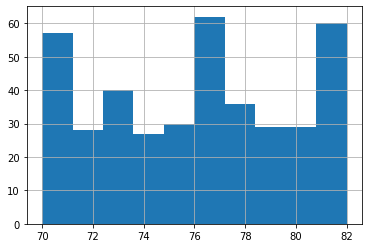

In [ ]:
dados['model_year'].hist()

#### Análise:
A partir das informações iniciais coletadas, é possível perceber que os carros disponíveis no banco de dados são modelos fabricados entre os anos 70 e início dos anos 80. Além disso, um ponto que me chamou atenção é que o 'mpg' (milhas por galão) aumenta à medida que os modelos mais novos são produzidos, o que faz bastante sentido se levarmos em consideração que a tecnologia automobilística evoluiu consideravelmente oferecendo aos consumidores possibilidades de economizar.

#### Exercício 2:  Procure por valores faltantes nas colunas do dataframe e faça as substituições mais razoáveis.

In [ ]:
#Função aponta que existem 6 dados faltantes na coluna "horsepower"
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [ ]:
#Verificando quais são os tipos de automóveis que estão com esses dados ausentes
dados[dados.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
#Como são modelos de carros diferentes, optei por não colocar valores iguais a 0 nas linhas faltantes e gravei os resultados
#na base de dados original. Para confirmar se a implementação deu certo, chamei a função print com a função (isnull())
dados.fillna(0, inplace = True)
print(dados.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


#### Exercício 3: Explore a função [`get_group()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html) para criar um subconjunto dos dados e analisar apenas as entradas referentes à `'origin' = usa`.

In [ ]:
dados.groupby('origin').get_group('usa')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,151.0,90.0,2950,17.3,82,usa,chevrolet camaro
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


#### Exercício 4: Remova os elementos duplicados e crie uma tabela de consumo em (Km/L) e altere os nomes dos países de orígem para que todos comecem com letras maiúsculas.

In [ ]:
#Em busca de elementos duplicados
dados.duplicated().any()

False

In [ ]:
#Criando uma tabela para Consumo em Km/L. Considerações importantes: 1mpg é equivalente a 2km/L
dados['Km/L'] = dados['mpg']*2.35
dados

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,42.30
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,35.25
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,42.30
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,37.60
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,39.95
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,63.45
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,103.40
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,75.20
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,65.80


In [ ]:
#Alterando os nomes dos países para que todos comecem cm letras maiúsculas
dados['origin'] = dados['origin'].str.capitalize()
dados

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,42.30
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,35.25
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,42.30
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,37.60
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,39.95
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,63.45
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,103.40
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,75.20
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,65.80


#### Exercício 5:  Imprima as matrizes de covariância e de correlação do dataframe e avalie as relações entre os atributos.

<AxesSubplot:>

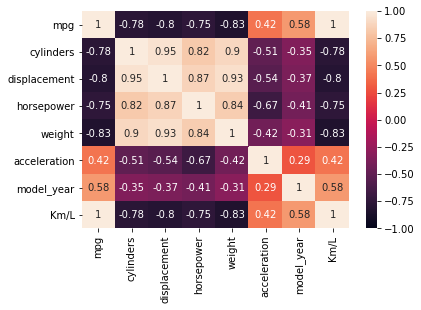

In [ ]:
#Imprimindo a matriz de correlação com mapa de calor entre os dados
dados.corr()
sns.heatmap(dados.corr(), annot = True, vmin=-1, vmax=1)

In [ ]:
#Imprimindo a matriz de covariância
dados.cov()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Km/L
mpg,61.089611,-10.308911,-655.402318,-237.405511,-5505.211745,9.058930,16.741163,143.560585
cylinders,-10.308911,2.893415,168.623214,56.282369,1290.695575,-2.370842,-2.193499,-24.225941
displacement,-655.402318,168.623214,10872.199152,3661.134476,82368.423240,-156.332976,-142.717137,-1540.195446
horsepower,-237.405511,56.282369,3661.134476,1621.636191,28576.966837,-74.841663,-61.286090,-557.902951
weight,-5505.211745,1290.695575,82368.423240,28576.966837,717140.990526,-974.899011,-959.946344,-12937.247601
acceleration,9.058930,-2.370842,-156.332976,-74.841663,-974.899011,7.604848,2.938105,21.288485
model_year,16.741163,-2.193499,-142.717137,-61.286090,-959.946344,2.938105,13.672443,39.341733
Km/L,143.560585,-24.225941,-1540.195446,-557.902951,-12937.247601,21.288485,39.341733,337.367376


#### Exercício 6: Gere gráficos de boxplots para todos os elementos numéricos do dataframe.

<AxesSubplot:>

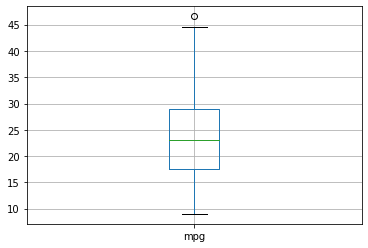

In [ ]:
dados.boxplot(['mpg'])

<AxesSubplot:>

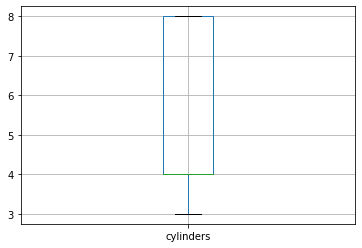

In [ ]:
dados.boxplot(['cylinders'])

<AxesSubplot:>

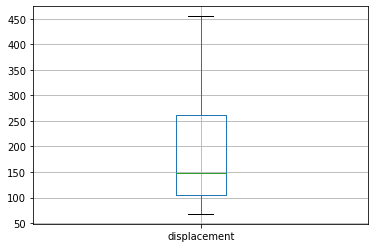

In [ ]:
dados.boxplot(['displacement'])

<AxesSubplot:>

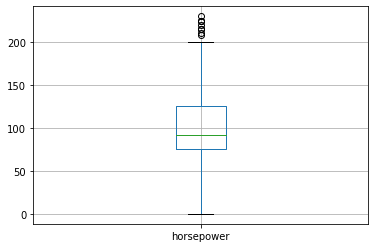

In [ ]:
dados.boxplot(['horsepower'])

<AxesSubplot:>

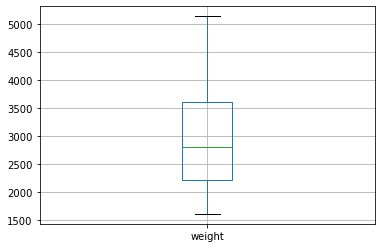

In [ ]:
dados.boxplot(['weight'])

<AxesSubplot:>

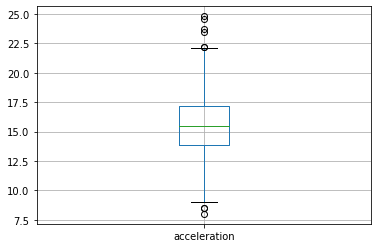

In [ ]:
dados.boxplot(['acceleration'])

<AxesSubplot:>

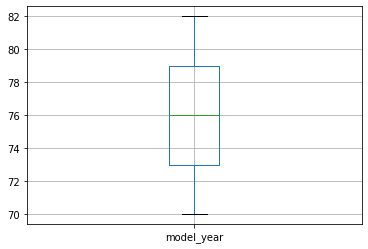

In [ ]:
dados.boxplot(['model_year'])

<AxesSubplot:>

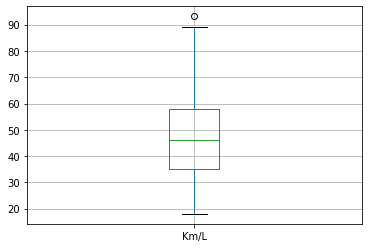

In [ ]:
dados.boxplot(['Km/L'])

#### Exercicio 7: Eliminando os elementos `'origin'`, `'name'`, `'model_year'`, calcule a matriz de correlação entre atributos remanecentes, incluindo apenas aquelas correlações que em módulo superam o corte de `0.8`, discuta tamb;em suas relações de proporcionalidade.

#### Calculando o pairplot das relações remanecentes.

In [ ]:
#Eliminando os elementos 'origin', 'name', 'model_year' e calculando a matriz de correlação.
dados.drop(['origin', 'name', 'model_year'], axis=1).corr()>0.8


,mpg,cylinders,displacement,horsepower,weight,acceleration,Km/L
mpg,True,False,False,False,False,False,True
cylinders,False,True,True,True,True,False,False
displacement,False,True,True,True,True,False,False
horsepower,False,True,True,True,True,False,False
weight,False,True,True,True,True,False,False
acceleration,False,False,False,False,False,True,False
Km/L,True,False,False,False,False,False,True


#### Calculando agora a matriz de correlação entre os elementos cujas correlações superam o corte proposto.

In [ ]:
dados.drop(['origin', 'name', 'model_year'], axis=1).corr()>0.8

,mpg,cylinders,displacement,horsepower,weight,acceleration,Km/L
mpg,True,False,False,False,False,False,True
cylinders,False,True,True,True,True,False,False
displacement,False,True,True,True,True,False,False
horsepower,False,True,True,True,True,False,False
weight,False,True,True,True,True,False,False
acceleration,False,False,False,False,False,True,False
Km/L,True,False,False,False,False,False,True


#### Exercicio 8: Use a função [pivot_table()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) para criar uma tabela dinâmica que calcule a média do consumo (miles/galon) `'mpg'`. Divida o dataframe em ano de modelo `'model_year'` e número de cilindros `'cylinders'`. Estude e descreva os resultados.

In [ ]:
#Tabela dinânimica
pd.pivot_table(dados, index = ['model_year', 'cylinders'], values= 'mpg', aggfunc =np.mean).round().head(10)

mpg
model_year cylinders      
70         4          25.0
           6          20.0
           8          14.0
71         4          27.0
           6          18.0
           8          13.0
72         3          19.0
           4          23.0
           8          14.0
73         3          18.0

#### Exercício 9: Agrupe o dataframe por origem  `'origin'` e número cilindros `'cylinders'` e calcule a média da potência `'horsepower'` dos carros fabricados.

In [ ]:
#Agrupando o dataframe por origem e cilindros, depois com a média da potência dos carros
dados.groupby(['origin', 'cylinders'])['horsepower'].mean().round()

origin  cylinders
Europe  4             76.0
        5             82.0
        6            114.0
Japan   3             99.0
        4             76.0
        6            116.0
Usa     4             78.0
        6             98.0
        8            158.0
Name: horsepower, dtype: float64

#### Exercício 10: Faça uma segregação ainda mais severa com os dados, criando uma lista de intervalos de anos (dois a dois) como corte para a leitura da média de consumo dos veículos produzidos, como agrupados por origem `'origin'`, ano de modelo `'year_model'` e número de cilindros `'cylinders'`. Discuta a evolução na média de consumo, por ano e por país e por cilindro.

#### Exercício 11: Crie uma nova coluna que reflita a região mundial em que as origens dos veículos se encontram, certifique-se de que essa coluna também conterá valores que começam com letras maiúsculas.

In [ ]:
#Verificando os países presentes no banco de dados
dados['origin'].unique()

array(['Usa', 'Japan', 'Europe'], dtype=object)

In [ ]:
def regions(dados):
    if dados['origin']=='Usa':
        return 'America'
    elif dados['origin']=='Japan':
        return 'Asia'
    elif dados['origin']=='Europe':
        return 'Europe'

In [ ]:
dados['Regions'] = dados.apply(regions, axis = 1)

In [ ]:
dados

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,Km/L,Regions
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,42.30,America
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,35.25,America
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,42.30,America
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,37.60,America
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,39.95,America
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,63.45,America
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,103.40,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,75.20,America
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,65.80,America


#### Exercício 12: Crie uma nova coluna com a relação peso/potência para cada veículo e plote um gráfico de dispersão dessa coluna com a de consumo que você criou no exercício 4

In [ ]:
#Criando uma nova coluna peso/potência
dados['weight_power'] = dados['weight']/dados['horsepower']
#Recuperando a coluna de consumo
dados['Km/L'] = dados['mpg']*2.35
dados

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,weight_power,Km/L
0,18.0,8,307.0,130.0,3504,12.0,70,Usa,chevrolet chevelle malibu,26.953846,42.30
1,15.0,8,350.0,165.0,3693,11.5,70,Usa,buick skylark 320,22.381818,35.25
2,18.0,8,318.0,150.0,3436,11.0,70,Usa,plymouth satellite,22.906667,42.30
3,16.0,8,304.0,150.0,3433,12.0,70,Usa,amc rebel sst,22.886667,37.60
4,17.0,8,302.0,140.0,3449,10.5,70,Usa,ford torino,24.635714,39.95
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,Usa,ford mustang gl,32.441860,63.45
394,44.0,4,97.0,52.0,2130,24.6,82,Europe,vw pickup,40.961538,103.40
395,32.0,4,135.0,84.0,2295,11.6,82,Usa,dodge rampage,27.321429,75.20
396,28.0,4,120.0,79.0,2625,18.6,82,Usa,ford ranger,33.227848,65.80


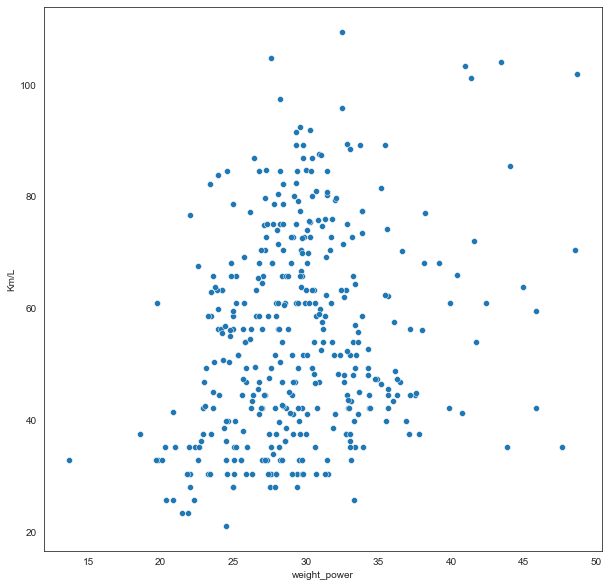

In [ ]:
# Criando o ambiente do gráfico
sns.set_style("white")
plt.figure(figsize=(10, 10))

# Gráfico de Dispersão
grafico = sns.scatterplot(x='weight_power', y='Km/L',
                    data=dados)
plt.show()